## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.

# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con el texto de las siguientes noticias, tienes que ingresar y copiar su contenido. (2 puntos por ambas comprobaciones):
  - Noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
  - Noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/

**Importante**: Activa el tipo de entorno de ejecución con GPU en Google Colab, y elimina los dataframes que no uses luego de las transformaciones para librerar RAM.

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

# **Parte 1**

In [ ]:
# Se importan las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
# Se descarga el archivo y se lo guarda en google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Lee un archivo CSV desde una ubicación en Google Drive.
El archivo está comprimido en formato ZIP, y pandas puede leer archivos ZIP directamente.
Ahora, 'dataset' es un objeto DataFrame de pandas que contiene los datos del archivo CSV.

"""
dataset = pd.read_csv("/content/drive/MyDrive/archive.zip")

In [ ]:
"""
dataset['text'] contiene las características (datos de entrada, en este caso, texto).
dataset['label'] contiene las etiquetas correspondientes a las características (en este caso, las etiquetas del texto).
Se divide el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train y y_train son las características y las etiquetas del conjunto de entrenamiento, respectivamente.
X_test y y_test son las características y las etiquetas del conjunto de prueba, respectivamente.
test_size=0.2 indica que el 20% del conjunto de datos se utilizará como conjunto de prueba.
random_state=40 se utiliza para que la división sea reproducible, es decir, si ejecutamos el código varias veces con el mismo valor,
obtendremmos la misma división.

"""
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['label'], test_size=0.2, random_state=40)

In [ ]:
"""
X_train es el conjunto de características de entrenamiento.
X_test es el conjunto de características de prueba.
'X_train = X_train.astype(str)': convierte los elementos del conjunto de características
de entrenamiento a cadenas de texto.
'X_test = X_test.astype(str)': convierte los elementos del conjunto de características
de prueba a cadenas de texto.

"""
X_train = X_train.astype(str)
X_test = X_test.astype(str)

In [ ]:
"""
Este código se encarga de tokenizar y convertir las secuencias de texto en índices numéricos,
además de realizar el relleno (padding) para asegurar que todas las secuencias tengan la misma
longitud antes de ser utilizadas para entrenar un modelo.
'max_words = 10000' es el número máximo de palabras distintas que se tendrán en cuenta al tokenizar el texto.
'maxlen = 200' es la longitud máxima de las secuencias de palabras después de la tokenización y el relleno.
'tokenizer = Tokenizer(num_words=max_words)': se crea un objeto Tokenizer de Keras con un límite en el
número de palabras distintas (num_words).
'tokenizer.fit_on_texts(X_train)': se ajusta el Tokenizer a las secuencias de texto de entrenamiento (X_train).
'X_train_seq = tokenizer.texts_to_sequences(X_train)': se convierten las secuencias de texto de entrenamiento
a secuencias de índices utilizando el Tokenizer.
'X_test_seq = tokenizer.texts_to_sequences(X_test)': se convierten las secuencias de texto de prueba a secuencias
de índices utilizando el mismo Tokenizer entrenado con los datos de entrenamiento.
'X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)'
'X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)': se realiza el relleno (padding) para que todas las secuencias
tengan la misma longitud (maxlen). Esto es necesario para alimentar las secuencias al modelo de aprendizaje automático.
El modelo consta de una capa de embedding para representar las palabras, seguida de una capa LSTM para modelar patrones
secuenciales, y finalmente una capa densa con una unidad de salida y activación sigmoide para realizar la clasificación binaria.
Este tipo de arquitectura es común en tareas de procesamiento de lenguaje natural (NLP) como la clasificación de texto.

"""
max_words = 10000
maxlen = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [ ]:
"""
'model = Sequential()': se crea un modelo secuencial, que permite construir una red neuronal capa por capa de manera secuencial.

'model.add(Embedding(input_dim=max_words, output_dim=128, input_length=maxlen))':
Se agrega una capa de Embedding.
'input_dim' es el tamaño del vocabulario (número máximo de palabras distintas).
'output_dim' es la dimensión de salida de los vectores de palabras embebidos.
'input_length' es la longitud de las secuencias de entrada (número máximo de palabras en una secuencia).

'model.add(LSTM(64))':
Se agrega una capa LSTM (Long Short-Term Memory).
64 es la dimensión de salida de las unidades LSTM.

'model.add(Dense(1, activation='sigmoid'))':
Se agrega una capa densa (totalmente conectada) con una unidad de salida y activación sigmoide.
Esta capa produce la salida final del modelo, que se interpreta como la probabilidad de pertenencia a la clase positiva.

"""
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
"""
Aquí se compila el modelo antes de entrenarlo.

Se especifica el optimizador 'adam', que es un algoritmo de optimización popular en aprendizaje profundo.
'model.compile(optimizer='adam',

Se utiliza la función de pérdida 'binary_crossentropy' para problemas de clasificación binaria.
Esta función de pérdida es adecuada para problemas de clasificación binaria donde la salida es una probabilidad.
loss='binary_crossentropy',

Se especifica la métrica 'accuracy' para evaluar el rendimiento del modelo durante el entrenamiento.
La métrica 'accuracy' mide la fracción de muestras correctamente clasificadas.
metrics=['accuracy'])

En resumen, este código configura la configuración esencial para el entrenamiento del modelo.

"""
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""
Se importa la clase EarlyStopping de la biblioteca Keras. Keras es una interfaz de alto nivel para construir
y entrenar modelos de aprendizaje profundo.

Creación del objeto EarlyStopping: Se crea un objeto llamado early_stopping de la clase EarlyStopping. Este objeto se utilizará
como un callback durante el entrenamiento para detenerlo si cierto criterio no mejora.

monitor='val_loss': Indica que el criterio a monitorear es la pérdida en el conjunto de validación (val_loss).

patience=3: Especifica que el entrenamiento se detendrá si la pérdida en el conjunto de validación no mejora
después de 3 épocas consecutivas.

Número de Épocas: Se define el número total de épocas para entrenar el modelo como 10.

Entrenamiento del Modelo:

Se utiliza el método fit para entrenar el modelo.
X_train_pad y y_train son los datos de entrenamiento (características y etiquetas, respectivamente).
epochs=epochs: Especifica el número total de épocas para entrenar el modelo.
validation_data=(X_test_pad, y_test): Indica el conjunto de datos de validación utilizado para evaluar el rendimiento del
modelo después de cada época.
callbacks=[early_stopping]: Se pasa una lista de callbacks al entrenamiento, en este caso, el objeto early_stopping que detendrá
el entrenamiento si se cumple el criterio especificado.

Historial del Entrenamiento:

El resultado del entrenamiento se almacena en la variable history. Contiene información sobre la evolución de la pérdida y otras
métricas a lo largo de las épocas.

En resumen, este código utiliza la devolución de llamada EarlyStopping para monitorear la pérdida en el conjunto de validación
y detener el entrenamiento si no mejora después de un cierto número de épocas, ayudando a prevenir el sobreajuste

"""
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
epochs = 10
history = model.fit(X_train_pad, y_train, epochs=epochs, validation_data=(X_test_pad, y_test), callbacks=[early_stopping] )

Epoch 1/10
1804/1804 [==============================] - 60s 31ms/step - loss: 0.2279 - accuracy: 0.9124 - val_loss: 0.1712 - val_accuracy: 0.9390
Epoch 2/10
1804/1804 [==============================] - 26s 14ms/step - loss: 0.1474 - accuracy: 0.9482 - val_loss: 0.1614 - val_accuracy: 0.9487
Epoch 3/10
1804/1804 [==============================] - 22s 12ms/step - loss: 0.0940 - accuracy: 0.9678 - val_loss: 0.1574 - val_accuracy: 0.9440
Epoch 4/10
1804/1804 [==============================] - 23s 13ms/step - loss: 0.0653 - accuracy: 0.9775 - val_loss: 0.1443 - val_accuracy: 0.9558
Epoch 5/10
1804/1804 [==============================] - 21s 12ms/step - loss: 0.0465 - accuracy: 0.9842 - val_loss: 0.1495 - val_accuracy: 0.9601
Epoch 6/10
1804/1804 [==============================] - 21s 12ms/step - loss: 0.0309 - accuracy: 0.9896 - val_loss: 0.1660 - val_accuracy: 0.9588
Epoch 7/10
1804/1804 [==============================] - 21s 12ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.1654 -

Epoch 1/10:

La pérdida (loss) en el conjunto de entrenamiento es 0.2279, con una precisión (accuracy) de aproximadamente 91.24%.
En el conjunto de validación (val_loss), la pérdida es 0.1712, con una precisión de aproximadamente 93.90%.

Epoch 2/10:

Continúa la mejora en la pérdida y la precisión tanto en el conjunto de entrenamiento como en el de validación.
La pérdida en el conjunto de entrenamiento es 0.1474, con una precisión de aproximadamente 94.82%.
La pérdida en el conjunto de validación es 0.1614, con una precisión de aproximadamente 94.87%.

Epoch 3/10:

Se observa una mejora continua en la pérdida y la precisión en ambos conjuntos.
La pérdida en el conjunto de entrenamiento es 0.0940, con una precisión de aproximadamente 96.78%.
La pérdida en el conjunto de validación es 0.1574, con una precisión de aproximadamente 94.40%.

Epoch 4/10:

La pérdida en el conjunto de entrenamiento sigue disminuyendo, y la precisión sigue aumentando.
La pérdida en el conjunto de entrenamiento es 0.0653, con una precisión de aproximadamente 97.75%.
La pérdida en el conjunto de validación es 0.1443, con una precisión de aproximadamente 95.58%.

Epoch 5/10:

Continúa la tendencia de disminución en la pérdida y aumento en la precisión en ambos conjuntos.
La pérdida en el conjunto de entrenamiento es 0.0465, con una precisión de aproximadamente 98.42%.
La pérdida en el conjunto de validación es 0.1495, con una precisión de aproximadamente 96.01%.

Epoch 6/10:

Se observa una mejora continua en la pérdida y la precisión en ambos conjuntos.
La pérdida en el conjunto de entrenamiento es 0.0309, con una precisión de aproximadamente 98.96%.
La pérdida en el conjunto de validación es 0.1660, con una precisión de aproximadamente 95.88%.

Epoch 7/10:

Continúa la tendencia de mejora, pero la pérdida en el conjunto de validación parece aumentar ligeramente.
La pérdida en el conjunto de entrenamiento es 0.0221, con una precisión de aproximadamente 99.32%.
La pérdida en el conjunto de validación es 0.1654, con una precisión de aproximadamente 96.02%.

Esta salida muestra cómo el modelo aprende durante el entrenamiento y cómo generaliza a través de las épocas en el conjunto de validación. La detención temprana (EarlyStopping) se activó después de la séptima epoch debido a la falta de mejora significativa en la pérdida en el conjunto de validación. El modelo parece estar realizando bien en la tarea de clasificación de texto.
La detención del entrenamiento en la séptima época busca prevenir el sobrejuste del modelo.

In [ ]:
"""
Este código se encarga de evaluar el rendimiento del modelo en el conjunto de prueba
después de haber sido entrenado.
La función evaluate devuelve la pérdida y la precisión del modelo en el conjunto de prueba.
'X_test_pad' contiene las secuencias de entrada de prueba con relleno.
'y_test' contiene las etiquetas de prueba correspondientes.
'loss, accuracy = model.evaluate(X_test_pad, y_test)'

'print(f'Precisión: {accuracy * 100:.2f}%')': aquí se imprime la precisión del modelo en el conjunto
de prueba en formato porcentual.

'print(f'Pérdida: {loss:.4f}')': se imprime la pérdida del modelo en el conjunto de prueba con cuatro decimales.

"""
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Precisión: {accuracy * 100:.2f}%')
print(f'Pérdida: {loss:.4f}')

451/451 [==============================] - 3s 7ms/step - loss: 0.1654 - accuracy: 0.9602
Precisión: 96.02%
Pérdida: 0.1654


La salida indica que, después de entrenar y evaluar el modelo en el conjunto de datos de prueba, se logró una precisión del 96.02% y una pérdida de 0.1654 en el conjunto de prueba. Esto sugiere que el modelo generaliza bien a datos que no ha visto durante el entrenamiento y tiene un buen rendimiento en la tarea de clasificación de textos en nuestro conjunto de datos.

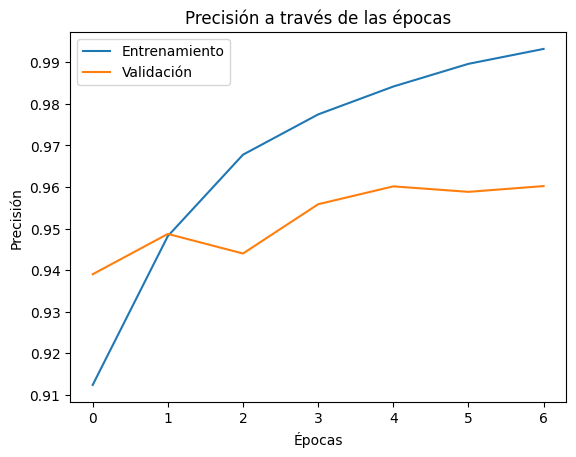

In [ ]:
# Se grafica la precisión del modelo en el conjunto de entrenamiento a lo largo de las épocas.
plt.plot(history.history['accuracy'], label='Entrenamiento')

# Se grafica la precisión del modelo en el conjunto de validación a lo largo de las épocas.
plt.plot(history.history['val_accuracy'], label='Validación')

# Se establece el título del gráfico.
plt.title('Precisión a través de las épocas')

# Se etiqueta el eje x como 'Épocas'.
plt.xlabel('Épocas')

# Se etiqueta el eje y como 'Precisión'.
plt.ylabel('Precisión')

# Se agrega una leyenda que indica qué línea corresponde a entrenamiento y cuál a validación.
plt.legend()

# Muestra el gráfico.
plt.show()

Epoch 1/10:

La precisión en el conjunto de entrenamiento es 91.24%.
En el conjunto de validación la precisión es de aproximadamente 93.90%.

Epoch 2/10:

Continúa la mejora en la precisión tanto en el conjunto de entrenamiento como en el de validación.
La precisión en el conjunto de entrenamiento es de aproximadamente 94.82%.
En tanto que, en el conjunto de validación se observa una precisión de aproximadamente 94.87%.

Epoch 3/10:

Se observa una mejora continua en la precisión en ambos conjuntos.
La precisión en el conjunto de entrenamiento es de 96.78%.
En el conjunto de validación la precisión es de 94.40%.

Epoch 4/10:

La precisión en el conjunto de entrenamiento sigue aumentando.
Para el conjunto de entrenamiento la precisión es de aproximadamente 97.75%.
En el conjunto de validación la precisión es de aproximadamente 95.58%.

Epoch 5/10:

Continúa la tendencia al aumento en la precisión en ambos conjuntos.
En el conjunto de entrenamiento la precisión alcanza al 98.42%.
Para el conjunto de validación la precisión es de aproximadamente 96.01%.

Epoch 6/10:

Se observa una mejora continua en la precisión en ambos conjuntos.
La precisión en el conjunto de entrenamiento es de aproximadamente 98.96%.
Mientras que, la precisión en el conjunto de validación es de aproximadamente 95.88%.

Epoch 7/10:

La precisión en el conjunto de entrenamiento es de aproximadamente 99.32%.
Para el conjunto de validación la precisión es de aproximadamente 96.02%.

El modelo parece estar realizando bien en la tarea de clasificación de texto.
La detención del entrenamiento en la séptima época busca prevenir el sobrejuste del modelo. En el gráfico que viene a continuación podremos observar los motivos de la detención del entrenamiento a partir de la época 7, en base a la falta de mejora significativa en la pérdida del conjunto de validación.

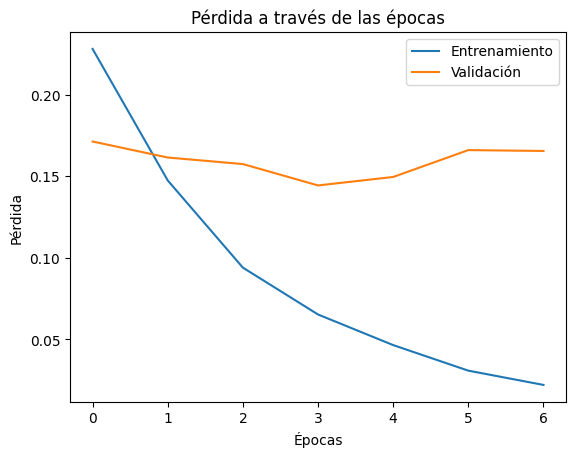

In [ ]:
# Se grafica la pérdida del modelo en el conjunto de entrenamiento y validación a lo largo de las épocas.
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')

# Se establece el título del gráfico.
plt.title('Pérdida a través de las épocas')

# Se etiqueta el eje x como 'Épocas'.
plt.xlabel('Épocas')

# Se etiqueta el eje y como 'Pérdida'.
plt.ylabel('Pérdida')

# Se agrega una leyenda que indica qué línea corresponde a entrenamiento y cuál a validación.
plt.legend()

# Muestra el gráfico.
plt.show()


Epoch 1/10:

La pérdida (loss) en el conjunto de entrenamiento es 0.2279 en tanto que,
en el conjunto de validación (val_loss), es 0.1712.

Epoch 2/10:

Continúa la mejora en la pérdida tanto en el conjunto de entrenamiento como en el de validación.
La pérdida en el conjunto de entrenamiento es 0.1474, mientras que en el conjunto de validación es 0.1614.

Epoch 3/10:

Se observa una mejora continua en la pérdida en ambos conjuntos.
La pérdida en el conjunto de entrenamiento es 0.0940, en tanto que
en el conjunto de validación es 0.1574.

Epoch 4/10:

La pérdida en el conjunto de entrenamiento sigue disminuyendo.
La pérdida en el conjunto de entrenamiento es 0.0653, mientras que en el conjunto de validación es 0.1443.

Epoch 5/10:

Continúa la tendencia de disminución en la pérdida en ambos conjuntos.
La pérdida en el conjunto de entrenamiento es 0.0465, en tanto que
en el conjunto de validación es 0.1495.

Epoch 6/10:

Se observa una mejora continua en la pérdida en ambos conjuntos.
La pérdida en el conjunto de entrenamiento es 0.0309, mientras
en el conjunto de validación es 0.1660.

Epoch 7/10:

Continúa la tendencia de mejora, pero la pérdida en el conjunto de validación parece aumentar ligeramente.
La pérdida en el conjunto de entrenamiento es 0.0221, mientras
en el conjunto de validación es 0.1654.

Esta gráfica muestra cómo el modelo aprende durante el entrenamiento y cómo generaliza a través de las épocas en el conjunto de validación. La detención temprana (EarlyStopping) se activó después de la séptima epoch debido a la falta de mejora significativa en la pérdida en el conjunto de validación. El modelo parece estar realizando bien en la tarea de clasificación de texto.
La detención del entrenamiento en la séptima época busca prevenir el sobrejuste del modelo.

In [ ]:
# En esta variable se almacena el texto de una noticia falsa.
fake_news_text = """
Exposed: FBI Director James Comey’s Clinton Foundation Connection
360,526
Democratic presidential candidate Hillary Clinton speaks during a campaign stop, Wednesday, April 20, 2016, in Philadelphia. (AP Photo/Matt Rourke)AP Photos
PATRICK HOWLEY10 Sep 201661,091
WASHINGTON, D.C. — A review of FBI Director James Comey’s professional history and relationships shows that the Obama cabinet leader — now under fire for his handling of the investigation of Hillary Clinton — is deeply entrenched in the big-money cronyism culture of Washington, D.C. His personal and professional relationships — all undisclosed as he announced the Bureau would not prosecute Clinton — reinforce bipartisan concerns that he may have politicized the criminal probe.

These concerns focus on millions of dollars that Comey accepted from a Clinton Foundation defense contractor, Comey’s former membership on a Clinton Foundation corporate partner’s board, and his surprising financial relationship with his brother Peter Comey, who works at the law firm that does the Clinton Foundation’s taxes.

Lockheed Martin

When President Obama nominated Comey to become FBI director in 2013, Comey promised the United States Senate that he would recuse himself on all cases involving former employers.

But Comey earned $6 million in one year alone from Lockheed Martin. Lockheed Martin became a Clinton Foundation donor that very year.

Comey served as deputy attorney general under John Ashcroft for two years of the Bush administration. When he left the Bush administration, he went directly to Lockheed Martin and became vice president, acting as a general counsel.

How much money did James Comey make from Lockheed Martin in his last year with the company, which he left in 2010? More than $6 million in compensation.

Lockheed Martin is a Clinton Foundation donor. The company admitted to becoming a Clinton Global Initiative member in 2010.

According to records, Lockheed Martin is also a member of the American Chamber of Commerce in Egypt, which paid Bill Clinton $250,000 to deliver a speech in 2010.

In 2010, Lockheed Martin won 17 approvals for private contracts from the Hillary Clinton State Department.

HSBC Holdings

In 2013, Comey became a board member, a director, and a Financial System Vulnerabilities Committee member of the London bank HSBC Holdings.

“Mr. Comey’s appointment will be for an initial three-year term which, subject to re-election by shareholders, will expire at the conclusion of the 2016 Annual General Meeting,” according to HSBC company records.

HSBC Holdings and its various philanthropic branches routinely partner with the Clinton Foundation. For instance, HSBC Holdings has partnered with Deutsche Bank through the Clinton Foundation to “retrofit 1,500 to 2,500 housing units, primarily in the low- to moderate-income sector” in “New York City.”

“Retrofitting” refers to a Green initiative to conserve energy in commercial housing units. Clinton Foundation records show that the Foundation projected “$1 billion in financing” for this Green initiative to conserve people’s energy in low-income housing units.

Who Is Peter Comey?

When our source called the Chinatown offices of D.C. law firm DLA Piper and asked for “Peter Comey,” a receptionist immediately put him through to Comey’s direct line. But Peter Comey is not featured on the DLA Piper website.

Peter Comey serves as “Senior Director of Real Estate Operations for the Americas” for DLA Piper. James Comey was not questioned about his relationship with Peter Comey in his confirmation hearing.

DLA Piper is the firm that performed the independent audit of the Clinton Foundation in November during Clinton-World’s first big push to put the email scandal behind them. DLA Piper’s employees taken as a whole represent a major Hillary Clinton 2016 campaign donation bloc and Clinton Foundation donation base.

DLA Piper ranks #5 on Hillary Clinton’s all-time career Top Contributors list, just ahead of Goldman Sachs.

And here is another thing: Peter Comey has a mortgage on his house that is owned by his brother James Comey, the FBI director.

Peter Comey’s financial records, obtained by Breitbart News, show that he bought a $950,000 house in Vienna, Virginia, in June 2008. He needed a $712,500 mortgage from First Savings Mortgage Corporation.

But on January 31, 2011, James Comey and his wife stepped in to become Private Party lenders. They granted a mortgage on the house for $711,000. Financial records suggest that Peter Comey took out two such mortgages from his brother that day.

This financial relationship between the Comey brothers began prior to James Comey’s nomination to become director of the FBI.

DLA Piper did not answer Breitbart News’ question as to whether James Comey and Peter Comey spoke at any point about this mortgage or anything else during the Clinton email investigation.

Peter Comey Re-Designed the FBI Building

FBI Director James Comey grew up in the New Jersey suburbs with his brother Peter. Both Comeys were briefly taken captive in 1977 by the “Ramsey rapist,” but the boys managed to escape through a window in their home, and neither boy was harmed.

James Comey became a prosecutor who worked on the Gambino crime family case. He went on to the Bush administration, a handful of private sector jobs, and then the Obama administration in 2013.

Peter Comey, meanwhile, went into construction.

After getting an MBA in real estate and urban development from George Washington University in 1998, Peter Comey became an executive at a company that re-designed George Washington University between 2004 and 2007 while his brother was in town working for the Bush administration.

In January 2009, at the beginning of the Obama administration, Peter Comey became “a real estate and construction consultant” for Procon Consulting.

Procon Consulting’s client list includes “FBI Headquarters Washington, DC.”

So what did Procon Consulting do for FBI Headquarters? Quite a bit, apparently. According to the firm’s records:

Procon provided strategic project management for the consolidation of over 11,000 FBI personnel into one, high security, facility.

Since 1972 the Federal Bureau of Investigation has had its headquarters in a purpose built 2.1 million square foot building on Pennsylvania Avenue. Having become functionally obsolete and in need of major repairs, GSA and the FBI were considering ways to meet the space needs required to maintain the Bureau’s mission and consolidate over 11,000 personnel.

Procon assisted GSA in assessing the FBI’s space needs and options for fulfilling those needs. Services provided included project management related to site evaluations, budgeting, due diligence, and the development of procurement and funding strategies.

Those “funding strategies” included talking to “stakeholders”: “Worked with stakeholders and key leadership to identify strategic objectives, goals and long range plans for capital and real estate projects.”

Procon Consulting obtained its contract for FBI Headquarters prior to James Comey’s nomination to serve as director of the FBI.

In June 2011, Peter Comey left Procon Consulting to become “Senior Director of Real Estate Operations for the Americas” for DLA Piper.

Peter Comey has generated some controversy in that role. According to Law360 in May 2013 (the same month that James Comey was confirmed as someone being considered by Obama to become FBI director):

Two real estate services businesses filed a $10 million suit against the law firm Monday alleging it stiffed them on as much as $760,000 of work done at DLA Piper’s Chicago office and improperly gave proprietary information to a competitor.

….

The plaintiffs take particular aim at Peter Comey, DLA Piper’s senior director of real estate operations. Leasecorp and SpaceLogik include several emails in the complaint that are purportedly from DLA Piper senior real estate partners Jay Epstein and Rich Klawiter and are sharply critical of Comey’s handling of the matter. In one email, Epstein wrote that “it’s an embarrassment for the firm to be treating someone who we are working with like this.”

In another email allegedly from Klawiter on Feb. 20, the DLA Piper partner informed Leasecorp President Michael Walker, a principal for both plaintiffs, that Comey had sent him and Epstein an email claiming that the real estate services firms were behind on their contractual obligations.

“I just received an email from Peter (Jay was also a recipient) that is so inflammatory I can’t even send it or you’ll hit the roof,” Klawiter said in the email, according to the complaint. “This is not going to end well.”

PoliticsClinton Email ScandalClinton FoundationFBIHSBCJames ComeyLockheed Martin
COMMENTS
Please let us know if you're having issues with commenting.

61,091
61,091
SOCIAL
MOST POPULAR
O’Reilly: 'Worst Campaigner Since Herbert Hoover' DeSantis Is Through
O’Reilly: 'Worst Campaigner Since Herbert Hoover' DeSantis Is Through
512
Karine Jean-Pierre's Lies at Presser: from Border to January 6
Karine Jean-Pierre's Lies at Presser: from Border to January 6
243
President Donald Trump shakes hands with Chairman of the Joint Chiefs of Staff Gen. Mark Milley during a briefing with senior military leaders in the Cabinet Room at the White House in Washington, Monday, Oct. 7, 2019. (AP Photo/Carolyn Kaster)
Never Trumper Claims Donald Trump Wants His Own Mercenary Force
3,717

Watch Live: Donald Trump Speaks in Atkinson, New Hampshire
135
Fani Willis Tells Atlanta Church: My Critics Are ‘Playing the Race Card'
Fani Willis Tells Atlanta Church: My Critics Are ‘Playing the Race Card'
4,103

The Ins and Outs of the Iowa Caucus Process: What to Expect
5,483
Rob Reiner Slams Christian Trump Supporters
Rob Reiner Slams Christian Trump Supporters
1,038
Poll: 65% Unlikely to Buy Electric Cars as They Strand Drivers in Freeze
Poll: 65% Unlikely to Buy Electric Cars as They Strand Drivers in Freeze
546
TEXAS BORDER SHOWDOWN: Give Us Access by Jan. 18, or Else, Say Feds
TEXAS BORDER SHOWDOWN: Give Us Access by Jan. 18, or Else, Say Feds
1,981
China on Iowa: 'The World Should Prepare' for Return of Trump
China on Iowa: 'The World Should Prepare' for Return of Trump
6,260
FROM THE HOMEPAGE
Never Trumper Claims Donald Trump Wants His Own Mercenary Force
Never Trumper Claims Donald Trump Wants His Own Mercenary Force
3,717
Watch Live: Donald Trump Speaks in Atkinson, New Hampshire
Watch Live: Donald Trump Speaks in Atkinson, New Hampshire
135
Vivek at Trump Event: 45th President Will ‘Shut Down that Deep State’
Vivek at Trump Event: 45th President Will ‘Shut Down that Deep State’
18
Nolte: Far-Left ABC Cancels Debate After Trump, Haley Refuse to Participate
Nolte: Far-Left ABC Cancels Debate After Trump, Haley Refuse to Participate
145
Exclusive – Iowa A.G. Brenna Bird on Trump’s Historic Caucus Win: ‘He Had the Energy and Momentum All over’ Hawkeye State
Exclusive – Iowa A.G. Brenna Bird on Trump’s Historic Caucus Win: ‘He Had the Energy and Momentum All over’ Hawkeye State
15
Marlow on ‘Kudlow’: Globalist Davos Crowd Is in a Panic Over Trump and Other Populist Victories Worldwide
Marlow on ‘Kudlow’: Globalist Davos Crowd Is in a Panic Over Trump and Other Populist Victories Worldwide
9
Poll: 65% of Americans Unlikely to Buy Electric Cars as They Strand Drivers in Winter Freeze
Poll: 65% of Americans Unlikely to Buy Electric Cars as They Strand Drivers in Winter Freeze
546
Poll: Donald Trump Dominates Joe Biden in Georgia
Poll: Donald Trump Dominates Joe Biden in Georgia
86
Karine Jean-Pierre’s Lies at Presser: from Border to January 6
Karine Jean-Pierre’s Lies at Presser: from Border to January 6
243
Former Saints Linebacker Ronald Powell Dead at 32
Former Saints Linebacker Ronald Powell Dead at 32
145
Top Conservative Anderson Quits Over Gov Deportation Rule Not Being Strong Enough
Top Conservative Anderson Quits Over Gov Deportation Rule Not Being Strong Enough
31
Breitbart Business Digest: Waller Says a Soft Landing Means Fed Can Wait on Cuts
Breitbart Business Digest: Waller Says a Soft Landing Means Fed Can Wait on Cuts
7




BREITBART NEWS
Masthead
About Us
Accessibility Statement
Policy Info
Terms of Use
Privacy Policy
Cookie Settings
Advertise
Contact Us
Careers
Store
Get the App
Newsletters
Send A Tip
Sitemap
Copyright © 2024 Breitbart
"""

In [ ]:
# En esta variable se almacena el texto de una noticia verdadera.
true_news_text = """
In Qatar, one of the World Cup’s first female refs will live an ‘impossible dream’

By Thomas Floyd
November 14, 2022 at 10:23 a.m. EST

Kathryn Nesbitt will be on the pitch at the World Cup in Qatar. (Caroline Yang for The Washington Post)
Listen
8 min

Share

Comment
94
Add to your saved stories
Save
Kathryn Nesbitt had spent a decade balancing parallel careers in analytical chemistry and soccer officiating when, in 2019, she put her scientific brain to work and synthesized a solution for the most pragmatic path forward.

Two weeks before Nesbitt left for France to serve as an assistant referee at the Women’s World Cup, she stepped down from her assistant professor position at Towson University to focus on officiating full time. What data points informed that decision? She reached the pinnacle of women’s soccer refereeing that summer and had broken into top-flight men’s soccer as well, with dozens of MLS games under her belt. Knowing the 2026 men’s World Cup would be held in the United States, Canada and Mexico, Nesbitt mapped out a plan that would culminate in her being on the sideline of the sport’s premier spectacle.

“I had no idea if they’d ever let women officiate at that World Cup, but I wanted to see if I could do that,” said Nesbitt, 34. “I realized at the time that in order to even attempt that, I would need to dedicate all of my time and effort into one job.”


Kathryn Nesbitt stepped down from her assistant professor position at Towson University to focus on officiating. (Stephen Maturen for The Washington Post)

A few years ago, Nesbitt served as an assistant referee at the Women’s World Cup in France. (Stephen Maturen for The Washington Post)
Once Nesbitt shifted her focus to officiating, her ascent accelerated. In 2020, she claimed MLS assistant referee of the year honors and became the first woman to officiate an MLS Cup final. A few months later, Concacaf — the confederation that oversees soccer in North America, Central America and the Caribbean — tasked her with men’s World Cup qualifying assignments. By the time FIFA, soccer’s global governing body, announced its pool of referees for the 2022 World Cup in Qatar, the Philadelphia-based official thought she might have a shot.


On May 19, Nesbitt woke up, scrolled through Twitter and saw FIFA’s unveiling. The tournament, FIFA stated in its announcement, would feature the first female referees in the 92-year history of the men’s World Cup, with six women among the 129 officials.

Zooming in on the 69 assistant referees, she saw the listing: “NESBITT Kathryn. USA.”

“I just got jaw-dropped, stared at it, couldn’t even believe that this was happening,” Nesbitt recalled. “Then I probably jumped around the room for the next 20 minutes.”


This year's tournament will feature a handful of female referees, including Nesbitt. (Stephen Maturen for The Washington Post)
Nesbitt prides herself, as a referee or a chemist, in processing the information at her disposal and arriving at the right conclusion. But in calculating her path to a men’s World Cup assignment, she shortchanged herself — by four years, in fact.

“She certainly achieves the highest standard in everything that she does,” said Mark Geiger, a former MLS, Olympic and World Cup referee who now serves as the director of senior match officials at the U.S.-based Professional Referee Organization. “She doesn’t settle for anything. She sets goals for herself, and she does everything that she possibly can to achieve those goals, whether it’s in the science field or whether it’s on the soccer field.”

YOUR GUIDE TO THE WORLD CUP
Next
Host Qatar is joined by the Netherlands, Senegal and Ecuador in Group A
Host Qatar is joined by the Netherlands, Senegal and Ecuador in Group A
The United States faces England, Wales and Iran in Group B
The United States faces England, Wales and Iran in Group B
Group C will feature Lionel Messi's Argentina alongside Poland, Mexico and Saudi Arabia
Group C will feature Lionel Messi's Argentina alongside Poland, Mexico and ...
Defending champion France is joined in Group D by Denmark, Tunisia and Australia
Defending champion France is joined in Group D by Denmark, Tunisia and Aust...
Group E kicks off when Germany meets Japan and Spain faces Costa Rica
Group E kicks off when Germany meets Japan and Spain faces Costa Rica
Group F kicks off when Morocco faces Croatia and Canada takes on Belgium
Group F kicks off when Morocco faces Croatia and Canada takes on Belgium
Group G will feature Brazil, Serbia, Switzerland and Cameroon
Group G will feature Brazil, Serbia, Switzerland and Cameroon
Portugal, Uruguay, South Korea and Ghana face off in Group H
Portugal, Uruguay, South Korea and Ghana face off in Group H
A soccer player in her youth, Nesbitt was a restless 14-year-old sitting through her little brother’s games in Rochester, N.Y., when she first volunteered to be an assistant referee (commonly known as a linesman). The role typically involves making throw-in, goal kick, corner kick, foul and offside calls, but as a teen volunteer with a familial conflict of interest, Nesbitt was simply asked to wave the flag when the ball went out of bounds and leave the rest to the paid referee.

“Then one of the guys actually asked me, ‘Hey, would you like to make money doing this?’ ” Nesbitt said. “And I was like, ‘Yeah, that sounds great.’ ”


Nesbitt was the first woman to officiate an MLS Cup final. (Stephen Maturen for The Washington Post)

Nesbitt, 34, was a soccer player in her youth. (Stephen Maturen for The Washington Post)
A senior-level figure skater and a volleyball player who competed for St. John Fisher University in Rochester, Nesbitt divided her time among no shortage of athletic exploits. Around the time she was wrapping up her college career, she began serving as a fourth official — a largely administrative role stationed between the team benches — for games involving Rochester’s minor league men’s team. Before long, Nesbitt landed a spot in a now-defunct U.S. Soccer program for fast-tracking top officiating prospects. In 2013, she became an assistant referee for the NWSL. Felisha Mariscal broke through as an MLS official a year later, and Nesbitt made her MLS debut in 2015.

Graphic: A closer look at the USMNT

But even as she rose up the ranks, soccer remained a side hustle. After studying chemistry as a graduate student at the University of Pittsburgh and completing a postdoctoral research fellowship at Michigan, Nesbitt joined the faculty at Towson, a public university in Maryland, in 2017. For the better part of two years, she did some 50 hours of lab research per week. Most Friday nights, Nesbitt would crawl to the airport through Baltimore rush-hour traffic and hop on a plane — to Los Angeles, Minnesota or wherever else her MLS assignments took her. After officiating a match, she would fly back Sunday night and do it all again.


“She managed those competing responsibilities exceptionally well,” said John Sivey, a professor who worked with Nesbitt in Towson’s chemistry department. “I don’t know how she did it, to be very honest, because the demands of both of those careers can be pretty substantial.”


Share this article
Share
After those long days of lab research, Nesbitt would flip on MLS games or devour film of the teams she would be officiating that weekend. Deeply understanding each club’s players and tactics allows her to better anticipate the flow of the game, she reasoned, and helps her parlay her strengths in academia to the soccer pitch.


“I had no idea if they’d ever let women officiate at that World Cup, but I wanted to see if I could do that,” Nesbitt said. “I realized at the time that in order to even attempt that, I would need to dedicate all of my time and effort into one job.” (Stephen Maturen for The Washington Post)
“One of the characteristics that I think strongly overlaps between a very good sports official and a very good analytical chemist is precision,” said Sivey, himself a former high school baseball and softball umpire and basketball referee. “For precision in analytical chemistry, we basically mean: How repeatable or reproducible is a particular experiment? In the sports officiating world, I think that looks a lot like consistency.”

To Geiger, who officiated alongside Nesbitt before retiring as a referee in 2019, that precision is just one of Nesbitt’s strengths. As a 6-foot former college athlete, she has no problem acing refereeing fitness standards designed for men. And Geiger can’t recall seeing her rattled, even in games that threatened to spiral out of the referee crew’s control.

THE USMNT HEADS TO QATAR
Next
The pain and promise of the USMNT’s World Cup exit
The pain and promise of the USMNT’s World Cup exit
Don’t view the USMNT’s loss as the end. It’s a down payment on the future.
PerspectiveDon’t view the USMNT’s loss as the end. It’s a down payment on the future.
Dear Christian Pulisic’s kid: This is what your dad did for U.S. soccer
PerspectiveDear Christian Pulisic’s kid: This is what your dad did for U.S. soccer
Why Gio Reyna, the oft-injured attacker, is the talk of Soccer Twitter
Why Gio Reyna, the oft-injured attacker, is the talk of Soccer Twitter
The U.S. has the youngest captain this World Cup. When he talks, his team listens.
The U.S. has the youngest captain this World Cup. When he talks, his team l...
The ‘bananas’ story of Matt Turner, the late-blooming USMNT goalkeeper at the World Cup
The ‘bananas’ story of Matt Turner, the late-blooming USMNT goalkeeper at t...
The USMNT’s Tim Weah, son of soccer royalty, earns the World Cup stage
The USMNT’s Tim Weah, son of soccer royalty, earns the World Cup stage
Tim Ream, the USMNT’s ‘grandpa’ at 35, never gave up on his World Cup dream
Tim Ream, the USMNT’s ‘grandpa’ at 35, never gave up on his World Cup dream
USMNT’s Walker Zimmerman is a very good soccer player. He might be a better teammate.
USMNT’s Walker Zimmerman is a very good soccer player. He might be a better...
How far can the U.S. men’s national team go? Your questions, answered.
How far can the U.S. men’s national team go? Your questions, answered.
In the Netherlands, the U.S. World Cup team sees both friends and foes
In the Netherlands, the U.S. World Cup team sees both friends and foes
Breaking down the U.S. midfield — and how it may operate against the Netherlands
AnalysisBreaking down the U.S. midfield — and how it may operate against the Nether...
U.S. star Christian Pulisic cleared to play against the Netherlands
U.S. star Christian Pulisic cleared to play against the Netherlands
The USMNT is banged up but buzzing headed into the World Cup knockout round
The USMNT is banged up but buzzing headed into the World Cup knockout round
Pulisic’s pelvic injury highlights athletes’ risks to a sensitive area
Pulisic’s pelvic injury highlights athletes’ risks to a sensitive area
Christian Pulisic ‘doing everything’ he can to play against the Netherlands
Christian Pulisic ‘doing everything’ he can to play against the Netherlands
With a courageous goal, USMNT tops Iran to advance at World Cup
With a courageous goal, USMNT tops Iran to advance at World Cup
Christian Pulisic has his moment, and the U.S. survives because of it
PerspectiveChristian Pulisic has his moment, and the U.S. survives because of it
On eve of World Cup match, USMNT addresses social media storm it didn’t create
On eve of World Cup match, USMNT addresses social media storm it didn’t cre...
USMNT’s hopeful World Cup run fizzles with loss to the Netherlands
USMNT’s hopeful World Cup run fizzles with loss to the Netherlands
“She not only can analyze what the correct decision should be, but she also knows from a feeling aspect what the best decision for the game would be,” Geiger said. “And they’re not always the same. Sometimes you need to really feel the game and know what the best decision is at that particular moment and what’s going to help the referee group maintain control of the game. She understands that.”


Nesbitt brings an analytical mind to soccer. (Stephen Maturen for The Washington Post)
Although MLS recently completed its eighth season using female referees, Nesbitt last year became the first woman to officiate Concacaf men’s World Cup qualifying games. She remembered getting plenty of stares from players, especially in those first few matches. Nesbitt said match coordinators also tended to mistakenly assume she was just the fourth official, there to help with substitutions and timekeeping but not roam the pitch.

“One of the biggest things I’ve learned in my career — and this has been in chemistry too, both being very male-heavy areas — is the best way to impress is to do your job well,” Nesbitt said. “But it would always be funny the first time I would do a sprint with one of the players down to the corner flag, and he’d look over, and I’d be keeping up with him. I think that had a really big effect just gaining some respect.”


Within months of her first men’s qualifier, Nesbitt had gained enough respect to book her ticket to Qatar. On that May morning when FIFA unveiled the World Cup officials, Sivey went door to door through the Towson chemistry department to excitedly share the news of their former colleague’s new assignment.

USMNT’s Walker Zimmerman is a very good soccer player. He might be a better teammate.

Eventually, Nesbitt figures she will hang up her cleats, stash away her flag and return to chemistry. For now, though, she understands her status as a soccer trailblazer — even if hearing that label prompts her to let out an embarrassed groan. As she prepares to make World Cup history, Nesbitt revels, appropriately enough, in the satisfaction that she made the right call back in 2019.

“This was an impossible dream for me, and just being able to witness females at this event now makes this realistic for all women,” Nesbitt said. “Whether it be in refereeing, whether it be in a different sport, whether it be in something completely different — sometimes just having a visual like that can make something actually be real. If I get to play even a small role in that, that’s really cool.”


(Stephen Maturen for The Washington Post)

Share

94
Comments
FIFA WORLD CUP
HAND CURATED
Host Qatar revels in World Cup opener, then suffers a deflating loss
November 20, 2022
The USMNT, a program reborn, awaits its first World Cup test
November 20, 2022
This World Cup is wired and fueled by AI
November 21, 2022
View 3 more stories

By Thomas Floyd
Thomas Floyd is a writer and editor for The Washington Post. He contributes coverage of theater, movies, television, books and comedy to the Weekend and Style sections and writes about soccer for Sports. Twitter
MORE FROM THE POST
Houthi attacks starting to reshape shipping flows
Today at 6:27 p.m. EST
Opinion|With Trump’s win, Liz Cheney and anti-MAGA GOP voters face a choice
Today at 7:45 a.m. EST
U.S. faces growing challenge in bid to contain Middle East violence
Today at 8:13 p.m. EST
Leftover snow, cold to delay or close many D.C. area schools Wednesday
Today at 7:47 p.m. EST
Review|‘The Last of Us Part II,’ remastered and dehumanized
Today at 10:00 a.m. EST

NEWSLETTER
AS NEWS BREAKS
Sports Alerts
Breaking news email alerts on major sports news.
Sign up
Subscribe to comment and get the full experience. Choose your plan →


Company
About The Post
Newsroom Policies & Standards
Diversity & Inclusion
Careers
Media & Community Relations
WP Creative Group
Accessibility Statement
Sitemap
Get The Post
Become a Subscriber
Gift Subscriptions
Mobile & Apps
Newsletters & Alerts
Washington Post Live
Reprints & Permissions
Post Store
Books & E-Books
Print Archives (Subscribers Only)
Today’s Paper
Public Notices
Coupons
Contact Us
Contact the Newsroom
Contact Customer Care
Contact the Opinions Team
Advertise
Licensing & Syndication
Request a Correction
Send a News Tip
Report a Vulnerability
Terms of Use
Digital Products Terms of Sale
Print Products Terms of Sale
Terms of Service
Privacy Policy
Cookie Settings
"""

In [ ]:
"""
'tokenizer.texts_to_sequences':
'tokenizer' es un objeto que ha sido previamente ajustado (entrenado) sobre datos de texto. Este objeto se utiliza para convertir
texto en secuencias de números enteros basadas en el vocabulario aprendido durante el entrenamiento.
'texts_to_sequences' toma una lista de textos (en este caso, una lista que contiene un solo elemento, que es el texto de una noticia)
y devuelve una lista de secuencias de números enteros. Cada número entero representa una palabra según el vocabulario del tokenizador.

'pad_sequences':
Después de obtener las secuencias de números enteros para las noticias falsas y verdaderas, la función pad_sequences se utiliza para ajustar
la longitud de estas secuencias a un tamaño específico (maxlen).
Si las secuencias son más cortas que maxlen, se agregan ceros al principio de la secuencia para que alcance la longitud deseada. Si es más larga,
se trunca para que tenga la longitud maxlen.
Esto es comúnmente necesario cuando se trabaja con modelos de aprendizaje profundo que requieren entradas de longitud fija, como las capas de
entrada en las redes neuronales recurrentes (RNN) o las capas de atención.
En resumen, este código está preparando datos de texto para ser alimentados a un modelo de aprendizaje profundo.
Las noticias falsas y verdaderas se han convertido en secuencias de números enteros y luego se han ajustado a una longitud máxima (maxlen)
para garantizar que todas las secuencias tengan la misma longitud antes de ingresar al modelo.

"""
fake_news_seq = tokenizer.texts_to_sequences([fake_news_text])
true_news_seq = tokenizer.texts_to_sequences([true_news_text])

fake_news_pad = pad_sequences(fake_news_seq, maxlen=maxlen)
true_news_pad = pad_sequences(true_news_seq, maxlen=maxlen)

In [ ]:
"""
'model.predict':

'model' es un objeto que representa el modelo de aprendizaje profundo que ha sido previamente entrenado en datos de texto.
La función 'predict' se utiliza para realizar predicciones utilizando el modelo. En este caso, estás pasando las secuencias
de texto procesadas (noticias falsas y verdaderas después de la tokenización y el relleno) al modelo para obtener predicciones.

Predicciones:

'model.predict' devuelve las predicciones del modelo para las entradas proporcionadas. Las predicciones podrían ser en diferentes
formatos dependiendo de la naturaleza del problema, pero comúnmente, para un problema de clasificación, representan las probabilidades
de pertenencia a cada clase.
En este contexto, como nuestro modelo está diseñado para clasificar noticias como falsas o verdaderas, 'fake_news_prediction' y 'true_news_prediction'
contendrán las salidas del modelo para las noticias falsas y verdaderas, respectivamente.

"""
fake_news_prediction = model.predict(fake_news_pad)
true_news_prediction = model.predict(true_news_pad)

1/1 [==============================] - 0s 23ms/step


In [ ]:
"""
Impresión de Predicciones:

'fake_news_prediction[0][0]' y 'true_news_prediction[0][0]' son las predicciones específicas obtenidas del modelo para las noticias falsas
y verdaderas, respectivamente.
Estas predicciones pueden interpretarse como la probabilidad de que el modelo clasifique la noticia como perteneciente a la clase positiva
(por ejemplo, noticia verdadera) en un problema de clasificación binaria.

'print':
La función print se utiliza para imprimir el resultado en la consola.
'print("Predicción para la noticia falsa:", fake_news_prediction[0][0])' imprime la predicción específica para la noticia falsa.
'print("Predicción para la noticia verdadera:", true_news_prediction[0][0])' imprime la predicción específica para la noticia verdadera.
En resumen, este código te proporciona las predicciones del modelo para una noticia falsa y una noticia verdadera en términos de la
probabilidad de pertenencia a la clase positiva (o la clase que se está buscando).

"""
print("Predicción para la noticia falsa:", fake_news_prediction[0][0])
print("Predicción para la noticia verdadera:", true_news_prediction[0][0])

Predicción para la noticia falsa: 0.9999938
Predicción para la noticia verdadera: 0.9999335


Interpretación:

Noticia Falsa (0.9999938):
La alta probabilidad (cercana a 1) para la noticia falsa indica que el modelo está muy seguro de que esta noticia pertenece a la clase de noticias falsas. Cuanto más cercano a 1, mayor es la confianza del modelo en la clasificación.

Noticia Verdadera (0.9999335):
De manera similar, la alta probabilidad para la noticia verdadera sugiere que el modelo está bastante seguro de que esta noticia pertenece a la clase de noticias verdaderas.

En resumen, los resultados indican que el modelo tiene una alta confianza en sus predicciones para ambas noticias, clasificándolas como falsas y verdaderas, respectivamente.

# **Parte 2**

In [ ]:
# Se importan las librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
"""
Aquí, estamos utilizando la función load_data() de TensorFlow para cargar el conjunto de datos MNIST.
Este conjunto de datos está compuesto por imágenes de dígitos escritos a mano, del 0 al 9.

'x_train': Es un array que contiene las imágenes de entrenamiento.
'y_train': Es un array que contiene las etiquetas correspondientes a las imágenes de entrenamiento.
'x_test': Es un array que contiene las imágenes de prueba.
'y_test': Es un array que contiene las etiquetas correspondientes a las imágenes de prueba.
Los datos de entrenamiento se utilizan para entrenar el modelo, mientras que los datos de prueba
se utilizan para evaluar el rendimiento del modelo después del entrenamiento.

En resumen, este código carga el conjunto de datos MNIST, dividiéndolo en datos de entrenamiento y datos de prueba,
y asigna esas divisiones a las variables 'x_train', 'y_train', 'x_test', y 'y_test'.

"""
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
"""
Se redimensionan las imágenes:
'x_train' y 'x_test' son matrices que contienen imágenes en formato (28, 28). Cada imagen representa un dígito escrito
a mano en una matriz de píxeles de 28x28.
La función reshape se utiliza para cambiar la forma de estas matrices. Específicamente, se agrega una dimensión adicional
al final, convirtiendo las matrices en tensores tridimensionales de la forma (número_de_imágenes, 28, 28, 1).
La dimensión adicional (1 al final) se refiere al canal de color. En este caso, se trata de una escala de grises, por lo
que solo hay un canal de color.

Se normalizan los valores de píxeles:
Después de redimensionar, el código divide todos los valores de píxeles por 255. Esto se hace para normalizar los valores
de píxeles a un rango entre 0 y 1.
Normalizar los valores de píxeles es común en el preprocesamiento de imágenes para que los modelos de aprendizaje automático
converjan más rápido durante el entrenamiento.

En resumen, este bloque de código prepara las imágenes del conjunto de datos MNIST para ser utilizadas en un modelo de
aprendizaje automático. Redimensiona las imágenes y normaliza los valores de píxeles, lo cual es una práctica común al
trabajar con datos de imágenes en el contexto de aprendizaje automático.

"""
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [ ]:
# Se convierten las etiquetas a one-hot encoding
"""
'One-Hot Encoding':
'One-Hot Encoding' es una técnica que se utiliza para representar etiquetas categóricas (como las etiquetas de clases en un problema de clasificación)
de una manera binaria.
En este caso, y_train y y_test contienen las etiquetas de clases asociadas a las imágenes en los conjuntos de entrenamiento y prueba,
respectivamente. Cada etiqueta es un número que representa la clase del dígito (por ejemplo, 0, 1, 2, ..., 9).

'tf.keras.utils.to_categorical':
La función 'to_categorical' de TensorFlow se utiliza para convertir las etiquetas enteras en un formato de one-hot encoding.
En este caso, el segundo argumento de la función es el número total de clases, que es 10. En el conjunto MNIST, hay 10 clases
correspondientes a los dígitos del 0 al 9.

Resultado:
Después de ejecutar este bloque de código, 'y_train' y 'y_test' se transforman en matrices en formato one-hot encoding.
Por ejemplo, si inicialmente 'y_train' tenía la etiqueta 3 para una imagen, después de la conversión, la representación one-hot encoding
sería un vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
Esto significa que la clase asociada a esa imagen es la clase 3. El mismo proceso se aplica a todas las etiquetas en los conjuntos de entrenamiento
y prueba.
Este preprocesamiento es común al trabajar con modelos de aprendizaje profundo para clasificación, ya que ayuda al modelo a entender mejor la relación
entre las clases y mejora el rendimiento durante el entrenamiento.

"""
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
"""
Creación del modelo:
'model_mnist = Sequential()': Se crea un modelo secuencial vacío. Este tipo de modelo se utiliza cuando las capas
se apilan una encima de la otra de manera secuencial.

Capas de convolución y max pooling:
'model_mnist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))': Se añade una capa de convolución con 32
filtros de tamaño (3, 3), función de activación ReLU y especifica las dimensiones de las imágenes de entrada.
'model_mnist.add(MaxPooling2D((2, 2)))': Se añade una capa de max pooling con un tamaño de pool de (2, 2)
para reducir la dimensionalidad.
Lo mismo se repite para una segunda capa de convolución y max pooling para aprender patrones más complejos.

Aplanar y capas completamente conectadas:

'model_mnist.add(Flatten())': Se añade una capa de aplanado para transformar la salida de las capas convolucionales
a un vector unidimensional.
'model_mnist.add(Dense(64, activation='relu'))': Se añade una capa densa con 64 unidades y función de activación ReLU.

Capa de salida:
'model_mnist.add(Dense(10, activation='softmax'))': Se añade la capa de salida con 10 unidades (una para cada clase en MNIST)
y función de activación softmax, que es común en problemas de clasificación multiclase.

"""
model_mnist = Sequential()
model_mnist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(MaxPooling2D((2, 2)))
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(MaxPooling2D((2, 2)))
model_mnist.add(Flatten())
model_mnist.add(Dense(64, activation='relu'))
model_mnist.add(Dense(10, activation='softmax'))

En este problema de reconocimiento de dígitos escritos a mano, la elección de las capas de la red neuronal convolucional se basa en la arquitectura típica utilizada para procesar imágenes. Aquí está la explicación detallada:

Capa de Convolución (Conv2D):

Se utiliza una capa de convolución con 32 filtros de 3x3 y activación 'relu' para extraer características importantes de las imágenes de los dígitos.
La activación 'relu' (unidad lineal rectificada) se elige comúnmente en capas convolucionales para introducir la no linealidad y permitir que la red aprenda patrones más complejos.

Capa de MaxPooling (MaxPooling2D):

Después de cada capa de convolución, se aplica una capa de max pooling con un tamaño de ventana de 2x2 para reducir la dimensionalidad y mantener las características más importantes.
Esto ayuda a hacer que la red sea más eficiente y reduce la cantidad de parámetros, evitando el sobreajuste.

Segunda Capa de Convolución y MaxPooling:

Se repite el patrón con una segunda capa de convolución y max pooling para aprender características más abstractas y complejas de las imágenes.

Capa de Aplanamiento (Flatten):

Después de las capas de convolución y max pooling, se utiliza una capa de aplanamiento para convertir la salida tridimensional en un vector unidimensional. Esto prepara los datos para las capas totalmente conectadas.

Capa Densa (Fully Connected):

Se añade una capa densa con 64 neuronas y activación 'relu'. Esta capa totalmente conectada busca combinar las características extraídas por las capas convolucionales para realizar una clasificación más precisa.

Capa de Salida Densa:

Finalmente, se añade una capa densa de salida con 10 neuronas (correspondientes a las 10 clases de dígitos) y activación 'softmax' para obtener las probabilidades de pertenencia a cada clase.

Elección de la función de pérdida y optimizador:

Se utiliza la función de pérdida 'categorical_crossentropy', ya que estamos abordando un problema de clasificación multiclase.
El optimizador 'adam' se elige comúnmente por su eficiencia y capacidad para adaptar automáticamente las tasas de aprendizaje durante el entrenamiento.

En resumen, la elección de estas capas sigue una arquitectura convencional para problemas de reconocimiento de patrones en imágenes, con capas convolucionales para extraer características y capas totalmente conectadas para la clasificación final. La combinación de estas capas ha demostrado ser efectiva en problemas similares, como el reconocimiento de dígitos escritos a mano.

In [ ]:
"""
Este código se encarga de configurar y compilar el modelo antes de entrenarlo.

Optimizer (Optimizador):

optimizer='adam': Especifica el optimizador que se utilizará durante el entrenamiento. En este caso, se utiliza el optimizador Adam.
Adam es un algoritmo de optimización popular en aprendizaje profundo debido a su eficiencia y buen rendimiento en una variedad de tareas.

Loss Function (Función de Pérdida):
loss='categorical_crossentropy': Define la función de pérdida que se minimizará durante el entrenamiento. Para problemas de clasificación
multiclase, especialmente cuando se usa one-hot encoding para las etiquetas, la función de pérdida comúnmente utilizada es la entropía
cruzada categórica (categorical_crossentropy). Esta función mide la diferencia entre las distribuciones de probabilidad predichas y
las distribuciones reales de las clases.

Metrics (Métricas):
metrics=['accuracy']: Especifica las métricas que se deben calcular y mostrar durante el entrenamiento y evaluación del modelo.
En este caso, se utiliza la precisión (accuracy) como métrica, que indica la proporción de predicciones correctas sobre el total de muestras.

En resumen, la compilación del modelo en Keras configura cómo se realizará el proceso de entrenamiento. El optimizador, la función de pérdida
y las métricas son aspectos críticos para determinar cómo se ajustarán los pesos del modelo durante el entrenamiento y cómo se evaluará
su rendimiento.

"""
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
"""
EarlyStopping (Detención Temprana):

'early_stopping = EarlyStopping(monitor='val_loss', patience=3)': Se define un objeto EarlyStopping. Esta técnica monitorea la pérdida
en el conjunto de validación (val_loss) y detendrá el entrenamiento si la pérdida en el conjunto de validación no mejora después de un cierto
número de epochs especificado por patience. En este caso, patience=3 significa que se detendrá si no hay mejora después de 3 epochs.

Número de Epochs:
'epochs = 10': Se define el número total de epochs para entrenar el modelo. Un epoch es una pasada completa a través de todo el conjunto
de datos de entrenamiento.

Entrenamiento del Modelo:

'model_mnist.fit(...)': Se realiza el entrenamiento del modelo. La función fit toma los datos de entrenamiento '(x_train e y_train)'
y entrena el modelo durante el número especificado de epochs.
'validation_data=(x_test, y_test)': Utiliza el conjunto de datos de prueba para evaluar el rendimiento del modelo después de cada epoch.
'callbacks=[early_stopping]': Se pasa la instancia de EarlyStopping como un callback durante el entrenamiento. Esto significa que el entrenamiento
se detendrá si se cumplen las condiciones definidas por el objeto EarlyStopping.

En resumen, este código entrena un modelo de red neuronal en el conjunto de datos MNIST durante un máximo de 10 epochs, utilizando el conjunto
de prueba para la validación, y utiliza la detención temprana para evitar el sobreajuste y mejorar la eficiencia del entrenamiento.

"""
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
epochs = 10
history_mnist = model_mnist.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1435 - accuracy: 0.9563 - val_loss: 0.0497 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0466 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0334 - val_accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0361 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0319 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0265 - val_accuracy

Epoch 1/10: La pérdida en el conjunto de entrenamiento es 0.1435, con una precisión del 95.63%. En el conjunto de validación, la pérdida es 0.0497 y la precisión es 98.40%.

Epoch 2/10: Se observa una mejora en la pérdida y la precisión tanto en el conjunto de entrenamiento como en el de validación. La pérdida en el conjunto de validación es 0.0466, con una precisión de 98.46%.

Epoch 3/10: Continúa la mejora en la pérdida y la precisión en ambas conjuntos. La pérdida en el conjunto de validación es 0.0334, con una precisión de 98.88%.

Epoch 4/10: Se sigue mejorando, con una pérdida en el conjunto de validación de 0.0316 y una precisión de 98.99%.

Epoch 5/10: Aunque la pérdida en el conjunto de validación aumenta ligeramente a 0.0361, la precisión sigue siendo alta (98.81%).

Epoch 6/10 a Epoch 10/10: Se observa una mejora continua en la precisión y la pérdida en ambas conjuntos. La precisión en el conjunto de validación alcanza un punto alto del 99.16% en la última época.

Dado que se ha configurado un EarlyStopping con una paciencia de 3 épocas, y no se ve ninguna señal de sobreajuste, el entrenamiento se detiene después de la décima época. El modelo parece estar aprendiendo bien, ya que la precisión en el conjunto de validación sigue mejorando. La salida sugiere un entrenamiento exitoso sin signos de sobreajuste.

In [ ]:
"""
'model_mnist.evaluate(x_test, y_test)':
Este método evalúa el rendimiento del modelo en el conjunto de datos de prueba (x_test e y_test). Devuelve dos valores: la pérdida y la precisión
del modelo en el conjunto de prueba.

'loss_mnist': Representa la pérdida obtenida durante la evaluación en el conjunto de prueba. La pérdida es una medida de qué tan bien se desempeña
el modelo; se busca minimizar este valor.

'accuracy_mnist': Representa la precisión del modelo en el conjunto de prueba. La precisión es la proporción de predicciones correctas sobre el total
de muestras.

Imprimir Resultados:

'print(f'Precisión: {accuracy_mnist * 100:.2f}%')': Imprime la precisión del modelo en el formato de porcentaje con dos decimales.

'print(f'Pérdida: {loss_mnist:.4f}')': Imprime la pérdida del modelo con cuatro decimales.

En resumen, este código evalúa el modelo entrenado en el conjunto de datos de prueba y muestra la precisión y la pérdida resultantes.
Este paso es crucial para comprender cómo generaliza el modelo a datos que no ha visto durante el entrenamiento y para evaluar su rendimiento
en tareas de clasificación como reconocimiento de dígitos en el conjunto de datos MNIST.

"""
loss_mnist, accuracy_mnist = model_mnist.evaluate(x_test, y_test)
print(f'Precisión: {accuracy_mnist * 100:.2f}%')
print(f'Pérdida: {loss_mnist:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0302 - accuracy: 0.9916
Precisión: 99.16%
Pérdida: 0.0302


La salida indica que, después de entrenar y evaluar el modelo en el conjunto de datos de prueba, se logró una precisión del 99.16% y una pérdida de 0.0302 en el conjunto de prueba. Esto sugiere que el modelo generaliza bien a datos que no ha visto durante el entrenamiento y tiene un buen rendimiento en la tarea de clasificación de dígitos escritos a mano en el conjunto de datos MNIST.

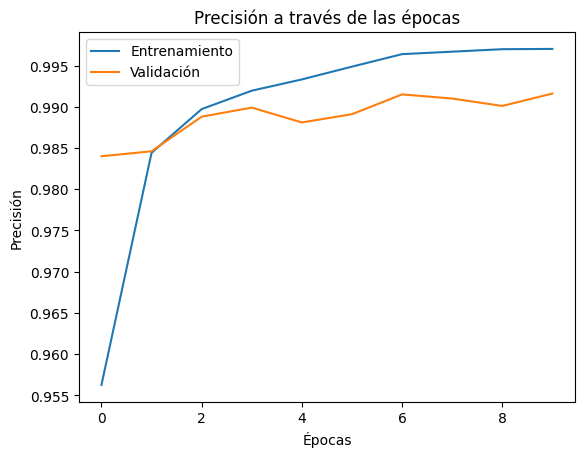

In [ ]:
# Se grafica la precisión a través de las épocas.
plt.plot(history_mnist.history['accuracy'], label='Entrenamiento')
plt.plot(history_mnist.history['val_accuracy'], label='Validación')
plt.title('Precisión a través de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

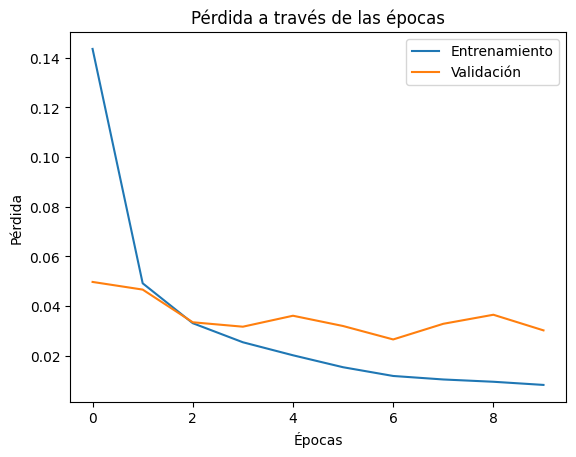

In [ ]:
# Se grafica la pérdida del modelo en el conjunto de entrenamiento y validación a lo largo de las épocas.
plt.plot(history_mnist.history['loss'], label='Entrenamiento')
plt.plot(history_mnist.history['val_loss'], label='Validación')

# Se establece el título del gráfico.
plt.title('Pérdida a través de las épocas')

# Se etiqueta el eje x como 'Épocas'.
plt.xlabel('Épocas')

# Se etiqueta el eje y como 'Pérdida'.
plt.ylabel('Pérdida')

# Se agrega una leyenda que indica qué línea corresponde a entrenamiento y cuál a validación.
plt.legend()

# Muestra el gráfico.
plt.show()


Después de observar ambos gráficos, se puede señalar que el modelo parece estar aprendiendo bien, ya que la precisión y la pérdida en el conjunto de validación siguen mejorando. No se obervan signos de sobreajuste en el modelo.

In [ ]:
"""
'predictions = model_mnist.predict(x_test[:10])':
Utiliza el modelo entrenado (model_mnist) para realizar predicciones en las primeras 10 imágenes del conjunto de datos de prueba (x_test).

Imprimir Predicciones:
'print("Predicciones:")': Imprime un encabezado para indicar que las siguientes líneas mostrarán las predicciones.

'for i, pred in enumerate(predictions):': Inicia un bucle para iterar sobre cada predicción y su respectiva etiqueta real.

'print(f"Imagen {i + 1}: Predicción -> {tf.argmax(pred).numpy()}, Etiqueta real -> {tf.argmax(y_test[i]).numpy()}")':
Imprime información para cada imagen:

'Imagen {i + 1}': Indica el número de la imagen en el conjunto de datos de prueba.

'Predicción -> {tf.argmax(pred).numpy()}': Muestra la clase predicha por el modelo, que es la posición del valor máximo
en el vector de predicciones.

'Etiqueta real -> {tf.argmax(y_test[i]).numpy()}': Muestra la etiqueta real de la imagen en el conjunto de datos de prueba,
utilizando la misma lógica que en la predicción.

En resumen, este código realiza predicciones en las primeras 10 imágenes del conjunto de datos de prueba y muestra las clases
predichas por el modelo, así como las etiquetas reales correspondientes. Esto permite verificar visualmente cómo se comparan
las predicciones del modelo con las etiquetas reales.

"""
predictions = model_mnist.predict(x_test[:10])
print("Predicciones:")
for i, pred in enumerate(predictions):
    print(f"Imagen {i + 1}: Predicción -> {tf.argmax(pred).numpy()}, Etiqueta real -> {tf.argmax(y_test[i]).numpy()}")


1/1 [==============================] - 0s 203ms/step
Predicciones:
Imagen 1: Predicción -> 7, Etiqueta real -> 7
Imagen 2: Predicción -> 2, Etiqueta real -> 2
Imagen 3: Predicción -> 1, Etiqueta real -> 1
Imagen 4: Predicción -> 0, Etiqueta real -> 0
Imagen 5: Predicción -> 4, Etiqueta real -> 4
Imagen 6: Predicción -> 1, Etiqueta real -> 1
Imagen 7: Predicción -> 4, Etiqueta real -> 4
Imagen 8: Predicción -> 9, Etiqueta real -> 9
Imagen 9: Predicción -> 5, Etiqueta real -> 5
Imagen 10: Predicción -> 9, Etiqueta real -> 9


Las predicciones del modelo parecen coincidir en gran medida con las etiquetas reales, ya que las predicciones y las etiquetas son consistentes para cada imagen.
Por ejemplo, para la primera imagen, el modelo predijo 7, y la etiqueta real también es 7. Similarmente, para otras imágenes, las predicciones del modelo se alinean con las etiquetas reales.
La precisión del modelo en estas predicciones específicas es del 100%, ya que todas las predicciones coinciden con las etiquetas reales. Esto es evidente en las coincidencias entre "Predicción" y "Etiqueta real" para cada imagen.